In [41]:
from graph_routing_env import RoutingEnv
import networkx as nx
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [42]:
import random
class ReplayBuffer():
    def __init__(self, size=10000):
        self.obs_mem = []
        self.act_mem = []
        self.rew_mem = []
        self.next_obs_mem = []
        self.ctr = 0
        self.size = size

    def store(self, obs, act, rew, next_obs):
        if self.ctr < self.size:
            self.obs_mem.append(obs)
            self.act_mem.append(act)
            self.rew_mem.append(rew)
            self.next_obs_mem.append(next_obs)
        else:
            idx = self.ctr % self.size
            self.obs_mem[idx] = obs
            self.act_mem[idx] = act
            self.rew_mem[idx] = rew
            self.next_obs_mem[idx] = next_obs

        self.ctr += 1

    def sample(self, num_samples):
        if self.ctr < num_samples:
            raise ValueError("Too few entries in replay buffer to sample!")

        idxs = random.sample(range(self.size), num_samples)

        obs_sample = [self.obs_mem[i] for i in idxs]
        act_sample = [self.act_mem[i] for i in idxs]
        rew_sample = [self.rew_mem[i] for i in idxs]
        next_obs_sample = [self.next_obs_mem[i] for i in idxs]

        return obs_sample, act_sample, rew_sample, next_obs_sample

0
100
200


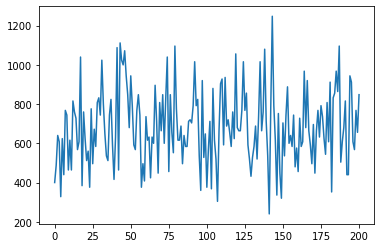

In [46]:
nx_graph = nx.petersen_graph()
env = RoutingEnv(nx_graph)
memory = ReplayBuffer(size=500)
returns = []
for i in range(201):
    total = 0
    if i % 100 == 0:
        print(i)
    obs, dgl_graph = env.reset()
    done = False
    while not done:
        act = env.sample_action()
        next_obs, reward, done = env.step(act)
        total += reward
        memory.store(obs, act, reward, next_obs)
        obs = next_obs
    returns.append(total)

plt.plot(returns)
plt.show()


In [49]:
print(memory.sample(10))

0.],
        [168.,   0.,   0.,   0.,   0.],
        [ 56.,   0.,  32.,   0.,  32.],
        [ 40.,   0.,   0.,  32.,   0.],
        [200.,  32.,   0.,   0.,   0.],
        [ 40.,   0.,   0.,   0.,   0.],
        [ 96.,   0.,  32.,   0.,   0.],
        [136.,   0.,   0.,   0.,   0.],
        [136.,   0.,   0.,   0.,   0.],
        [168.,   0.,   0.,   0.,   0.],
        [200.,   0.,   0.,   0.,   0.],
        [104.,   0.,   0.,   0.,   0.],
        [136.,   0.,   0.,   0.,   0.],
        [152.,   0.,   0.,   0.,   0.],
        [200.,   0.,   0.,   0.,   0.],
        [136.,   0.,   0.,   0.,   0.],
        [200.,   0.,   0.,   0.,   0.],
        [184.,   0.,   0.,   0.,   0.],
        [168.,   0.,   0.,   0.,   0.],
        [200.,  32.,   0.,   0.,   0.]]), tensor([[192.,   0.,  32.,   0.,   0.],
        [ 72.,   0.,   0.,   0.,  32.],
        [ 72.,   0.,   0.,   0.,   0.],
        [ 40.,   0.,   0.,   0.,   0.],
        [ 96.,   0.,  32.,   0.,   0.],
        [136.,   0.,   0.,   0., 